In [8]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

# convert RGB FITS array to grayscale
def grayscale(arr):
    if arr.ndim == 3:  # If the array is RGB (3D)
        rgb_index = np.array([0.299, 0.587, 0.114])
        arr = np.array(arr, dtype=np.float64)
        grayscale_array = np.einsum('i,ijk->jk', rgb_index, arr)
        return grayscale_array
    # elif arr.ndim == 2:  # If the array is already grayscale (2D)
        # return arr
    else:
        raise ValueError("ah hell nah. what is this array shape?")

fits_directories = [
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_160',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_100',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_60',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_40',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_25',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_20',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_13',
    '/Users/kiavash/Desktop/astronomy_lab/hw3/iso100_time1_8',

]

exposure_times = [1/160, 1/100, 1/60, 1/40, 1/25, 1/20, 1/13, 1/8]

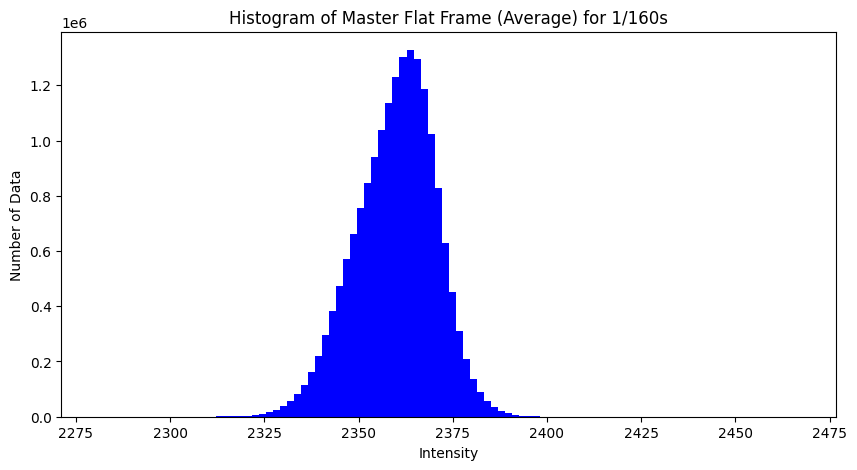

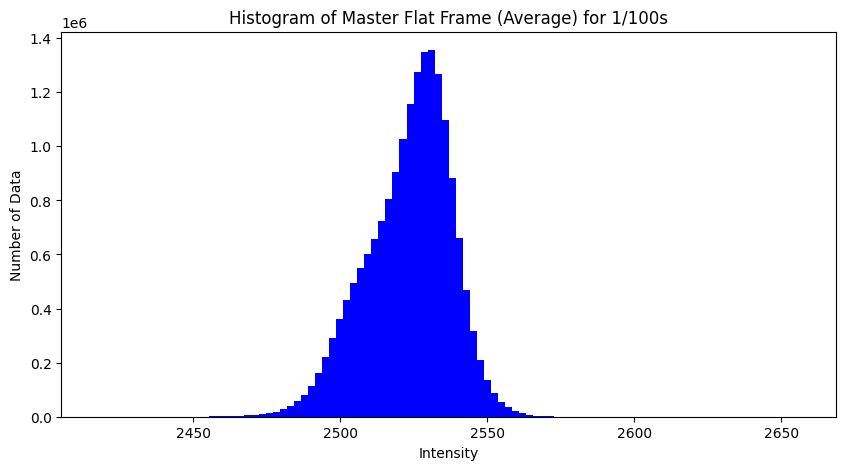

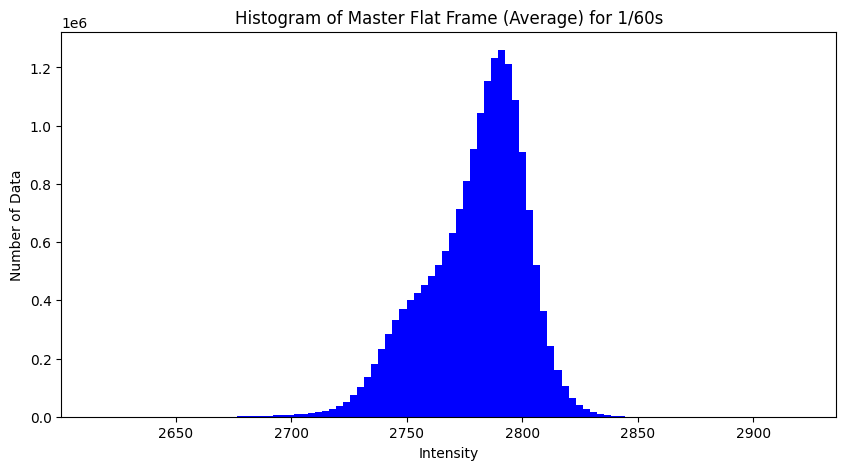

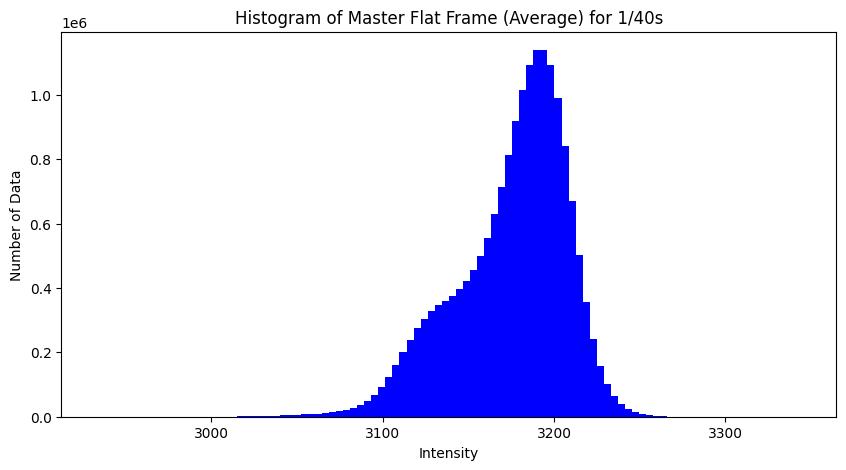

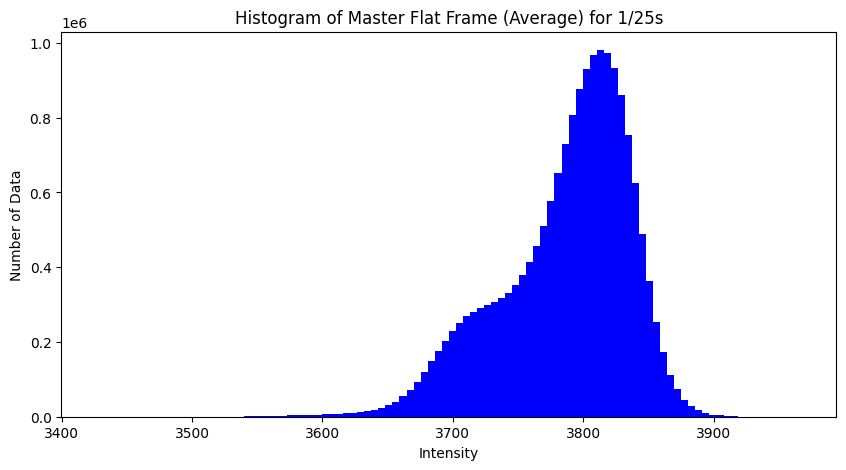

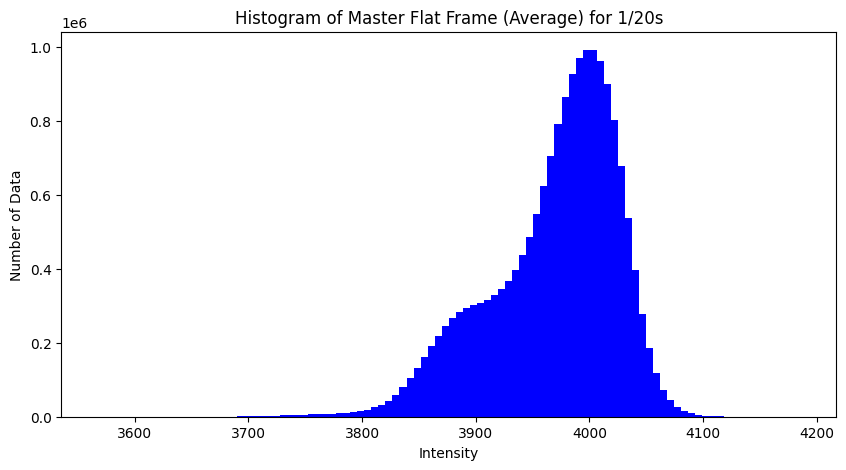

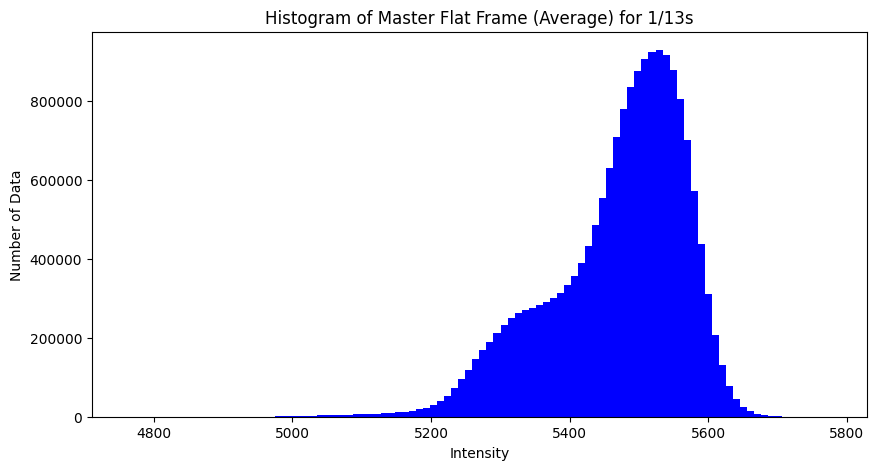

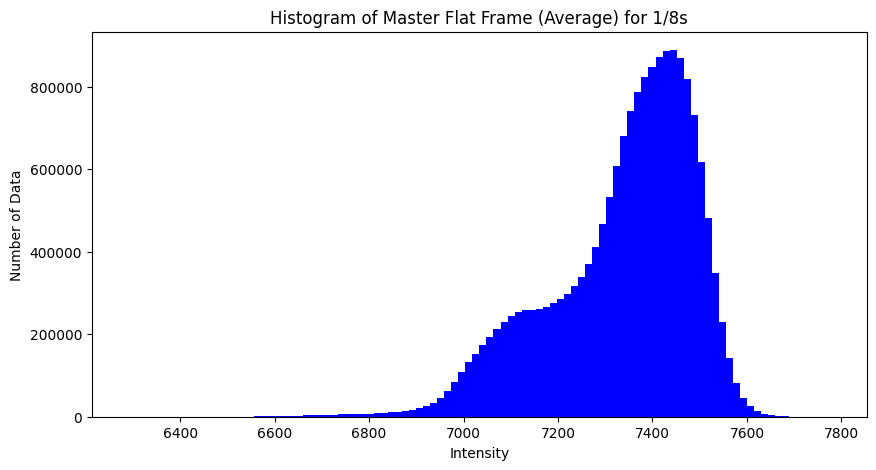

In [9]:
mean_values = []
std_values_mean = []
variance_values_mean = []
mean_errors = []

for fits_directory, exposure in zip(fits_directories, exposure_times):
    fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fits')]
    grayscale_arrays = []

    for file in fits_files:
        fits_path = os.path.join(fits_directory, file)
        array = fits.open(fits_path)[0].data
        array_gray = grayscale(array)
        grayscale_arrays.append(array_gray)

    grayscale_stack = np.stack(grayscale_arrays, axis=0)
    master_flat_average = np.mean(grayscale_stack, axis=0)

    master_flat_average_flat = master_flat_average.flatten()

    # standard error (std / sqrt(N))
    N_pixels = master_flat_average_flat.size  # Total number of pixels
    mean_error = np.std(master_flat_average_flat) / np.sqrt(N_pixels)

    bins = 100
    # zoom in histograms
    range_min, range_max = np.percentile(master_flat_average_flat, [0, 100])

    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram of Master Flat Frame (Average) for 1/{int(1/exposure)}s')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Data')
    plt.hist(master_flat_average_flat, bins=bins, range=(range_min, range_max), color='blue')
    plt.show()

    mean_values.append(np.mean(master_flat_average_flat))
    std_values_mean.append(np.std(master_flat_average_flat))
    variance_values_mean.append(np.var(master_flat_average_flat))
    mean_errors.append(mean_error)

In [11]:
print("Exposure Time (s) | Mean Intensity ± Error | Variance")
print("--------------------------------------------------------------------")
for exp, mean, mean_err, var in zip(exposure_times, mean_values, mean_errors, variance_values_mean):
    print(f"1/{int(1/exp)}s | {mean:.4f} ± {mean_err:.4f} | {var:.4f}")

Exposure Time (s) | Mean Intensity ± Error | Variance
--------------------------------------------------------------------
1/160s | 2359.8353 ± 0.0025 | 112.7813
1/100s | 2523.3302 ± 0.0034 | 209.6495
1/60s | 2779.8717 ± 0.0050 | 457.1656
1/40s | 3175.1429 ± 0.0076 | 1047.7445
1/25s | 3786.3896 ± 0.0117 | 2480.0904
1/20s | 3969.0007 ± 0.0132 | 3162.7928
1/13s | 5468.9781 ± 0.0231 | 9626.7434
1/8s | 7336.2021 ± 0.0360 | 23413.2208


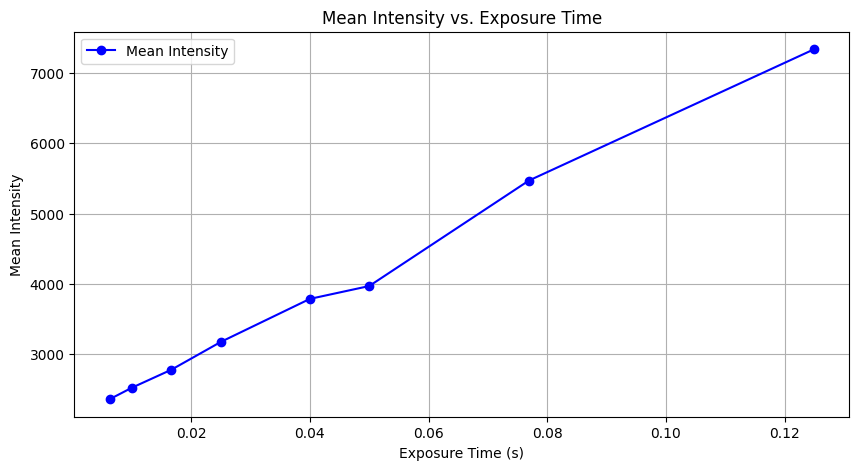

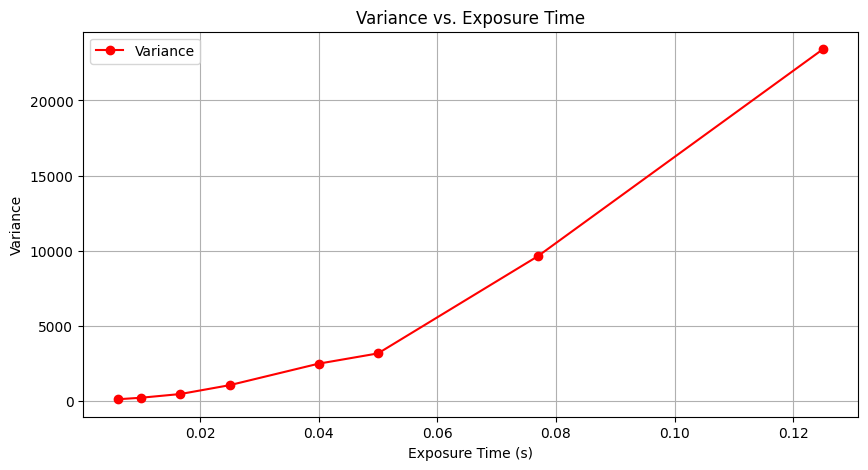

In [23]:
# Mean Intensity vs. Exposure Time with Error Bars
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, mean_values,'bo-', label='Mean Intensity')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity vs. Exposure Time')
plt.legend()
plt.grid(True)
plt.show()

# Variance vs. Exposure Time
plt.figure(figsize=(10, 5))
plt.plot(exposure_times, variance_values_mean, 'ro-', label='Variance')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Variance')
plt.title('Variance vs. Exposure Time')
plt.legend()
plt.grid(True)
plt.show()